In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

import lightgbm as lgb
import xgboost as xgb
import sklearn.datasets
import gc

In [2]:
# train_X = pd.read_csv('music_data/train_X.csv')
train_X = pd.read_csv('music_data/train_X_date_converted.csv')
train_y = pd.read_csv('music_data/train_Y.csv')

# val_X = pd.read_csv('music_data/valid_X.csv')
val_X = pd.read_csv('music_data/valid_X_date_converted.csv')
val_y = pd.read_csv('music_data/valid_Y.csv')

# test_X = pd.read_csv('music_data/test_X.csv')
test_X = pd.read_csv('music_data/test_X_date_converted.csv')
test_y = pd.read_csv('music_data/test_Y.csv')

# train_tiny_X = pd.read_csv('music_data/train_tiny_X.csv')
train_tiny_X = pd.read_csv('music_data/train_tiny_X_date_converted.csv')
train_tiny_y = pd.read_csv('music_data/train_tiny_Y.csv')

# val_tiny_X = val_X[:1000].copy()
val_tiny_X = pd.read_csv('music_data/val_tiny_X_date_converted.csv')
val_tiny_y = val_y[:1000].copy()

In [5]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 5000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
                      #,learning_rates=[0.05] * 1500 + [0.01] * 500)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [92]:
#tiny
modelC, pred_val_y = run_lgbc(train_tiny_X, train_tiny_y['target'], val_tiny_X, val_tiny_y['target'])
print(classification_report(val_tiny_y['target'], modelC.predict(val_tiny_X)>0.5))
print(roc_auc_score(val_tiny_y['target'], modelC.predict(val_tiny_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.637592
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.637379
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65       477
         1.0       0.68      0.57      0.62       523

   micro avg       0.63      0.63      0.63      1000
   macro avg       0.64      0.64      0.63      1000
weighted avg       0.64      0.63      0.63      1000

0.6905051088102424


In [7]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.5,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 10000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500)
                      #,learning_rates=[0.05] * 1500 + [0.01] * 500)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [8]:
#10000, 0.5
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'], y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.594526
[1000]	valid_0's binary_logloss: 0.579599
[1500]	valid_0's binary_logloss: 0.570783
[2000]	valid_0's binary_logloss: 0.564472
[2500]	valid_0's binary_logloss: 0.558984
[3000]	valid_0's binary_logloss: 0.55488
[3500]	valid_0's binary_logloss: 0.551954
[4000]	valid_0's binary_logloss: 0.548954
[4500]	valid_0's binary_logloss: 0.546206
[5000]	valid_0's binary_logloss: 0.543999
[5500]	valid_0's binary_logloss: 0.542265
[6000]	valid_0's binary_logloss: 0.541018
[6500]	valid_0's binary_logloss: 0.539853
[7000]	valid_0's binary_logloss: 0.538518
[7500]	valid_0's binary_logloss: 0.537506
[8000]	valid_0's binary_logloss: 0.536668
[8500]	valid_0's binary_logloss: 0.535484
[9000]	valid_0's binary_logloss: 0.534512
[9500]	valid_0's binary_logloss: 0.533923
[10000]	valid_0's binary_logloss: 0.533322
Did not meet early stopping. Best iteration is:
[9998]	valid_0's binary_logloss: 0.53332
         

In [3]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.5,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 15000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500
                      ,learning_rates=[0.5] * 10000 + [0.1] * 5000)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [4]:
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'],y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.594526
[1000]	valid_0's binary_logloss: 0.579599
[1500]	valid_0's binary_logloss: 0.570783
[2000]	valid_0's binary_logloss: 0.564472
[2500]	valid_0's binary_logloss: 0.558984
[3000]	valid_0's binary_logloss: 0.55488
[3500]	valid_0's binary_logloss: 0.551954
[4000]	valid_0's binary_logloss: 0.548954
[4500]	valid_0's binary_logloss: 0.546206
[5000]	valid_0's binary_logloss: 0.543999
[5500]	valid_0's binary_logloss: 0.542265
[6000]	valid_0's binary_logloss: 0.541018
[6500]	valid_0's binary_logloss: 0.539853
[7000]	valid_0's binary_logloss: 0.538518
[7500]	valid_0's binary_logloss: 0.537506
[8000]	valid_0's binary_logloss: 0.536668
[8500]	valid_0's binary_logloss: 0.535484
[9000]	valid_0's binary_logloss: 0.534512
[9500]	valid_0's binary_logloss: 0.533923
[10000]	valid_0's binary_logloss: 0.533322
[10500]	valid_0's binary_logloss: 0.533041
[11000]	valid_0's binary_logloss: 0.532816
[11500]	vali

In [5]:
y_pred_test = modelC.predict(test_X)


              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73    732500
         1.0       0.74      0.73      0.73    742961

   micro avg       0.73      0.73      0.73   1475461
   macro avg       0.73      0.73      0.73   1475461
weighted avg       0.73      0.73      0.73   1475461

0.8101565521905105


In [6]:
print(classification_report(test_y['target'],y_pred_test>0.5))
print(roc_auc_score(test_y['target'], y_pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73    732814
         1.0       0.74      0.73      0.73    742647

   micro avg       0.73      0.73      0.73   1475461
   macro avg       0.73      0.73      0.73   1475461
weighted avg       0.73      0.73      0.73   1475461

0.8100660044433854


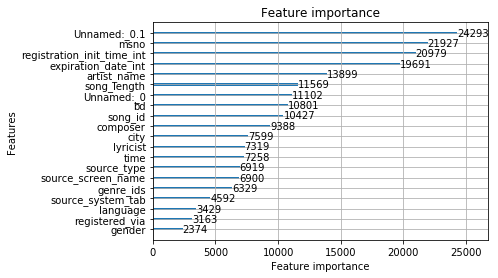

In [8]:
#get model importance
lgb.plot_importance(modelC)
feature_imp=modelC.feature_importance()

In [9]:
#save results
np.savez('output/lgb_results.npz', val_target=val_y['target'], val_preds= y_pred, test_target = test_y['target'], test_preds=y_pred_test,
        feature_importance = feature_imp)

In [10]:
y_pred.shape

(1475461,)

In [ ]:
#load results


add cat features

Feature Importance

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.594526
[1000]	valid_0's binary_logloss: 0.579599
[1500]	valid_0's binary_logloss: 0.570783
[2000]	valid_0's binary_logloss: 0.564472
[2500]	valid_0's binary_logloss: 0.558984
[3000]	valid_0's binary_logloss: 0.55488
[3500]	valid_0's binary_logloss: 0.551954
[4000]	valid_0's binary_logloss: 0.548954
[4500]	valid_0's binary_logloss: 0.546206
[5000]	valid_0's binary_logloss: 0.543999
[5500]	valid_0's binary_logloss: 0.542265
[6000]	valid_0's binary_logloss: 0.541018
[6500]	valid_0's binary_logloss: 0.539853
[7000]	valid_0's binary_logloss: 0.538518
[7500]	valid_0's binary_logloss: 0.537506
[8000]	valid_0's binary_logloss: 0.536668
[8500]	valid_0's binary_logloss: 0.535484
[9000]	valid_0's binary_logloss: 0.534512
[9500]	valid_0's binary_logloss: 0.533923
[10000]	valid_0's binary_logloss: 0.533322
Early stopping, best iteration is:
[10233]	valid_0's binary_logloss: 0.53308
              precisi

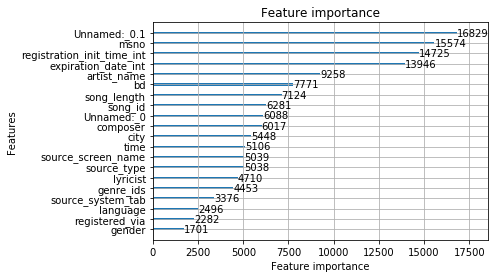

In [3]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.5,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 15000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500)
                      #,learning_rates=[0.5] * 10000 + [0.1] * 5000)
    lgb.plot_importance(model)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'],y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))